In [1]:
pip install mysql-connector-python

In [2]:
import mysql.connector
import pandas as pd

In [ ]:
# Connect to MySQL database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Mounika@0521",
  database="project"
)

In [3]:
 # Load movie data into a Pandas dataframe
data = pd.read_csv('movies_data.csv')

In [4]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes
0,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8
1,#Yaaram,2019,110,"Comedy, Romance",4.4,35
2,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827
3,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086
4,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326


In [5]:
data.shape

(5659, 6)

In [6]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes'], dtype='object')

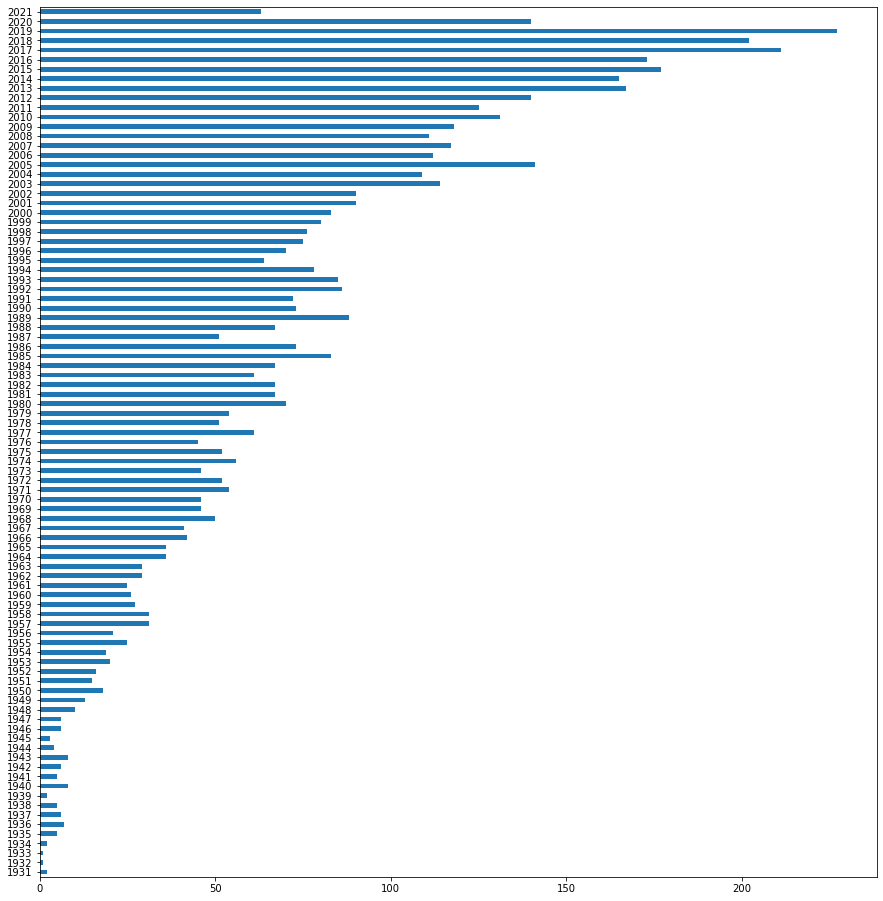

In [7]:
# we have movies from 1931 to 2021
import matplotlib.pyplot as plt
data.Year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [8]:
# recommendation will be based on these features only
data = data.loc[:,['Duration', 'Genre', 'Rating', 'Votes','Name']]


In [9]:
#relacing , with space for further analysis
data['Genre'] = data['Genre'].str.replace(',', ' ')

In [10]:
data.head()

,Duration,Genre,Rating,Votes,Name
0,109,Drama,7.0,8,#Gadhvi (He thought he was Gandhi)
1,110,Comedy Romance,4.4,35,#Yaaram
2,147,Comedy Drama Musical,4.7,827,...Aur Pyaar Ho Gaya
3,142,Drama Romance War,7.4,1086,...Yahaan
4,82,Horror Mystery Thriller,5.6,326,?: A Question Mark


In [11]:
data['Name'] = data['Name'].str.lower()

In [12]:
# null terminating char at the end
data['Name'][1]

'#yaaram'

In [13]:
data.to_csv('data.csv',index=False)

In [14]:
data['Genre']

0                           Drama
1                 Comedy  Romance
2          Comedy  Drama  Musical
3             Drama  Romance  War
4       Horror  Mystery  Thriller
                  ...            
5654                        Drama
5655    Biography  Drama  History
5656         Action  Crime  Drama
5657                Action  Drama
5658                Action  Drama
Name: Genre, Length: 5659, dtype: object

In [15]:
def Name(x):
    casts = []
    for i in x:
        casts.append(i.get('Name'))
    if casts == []:
        return np.NaN
    else:
        return (casts[0])

In [17]:
data.isna().sum()

Duration    0
Genre       0
Rating      0
Votes       0
Name        0
dtype: int64

In [18]:
data = data.rename(columns={'Genre':'genres_list'})
data = data.rename(columns={'Name':'movie_title'})

In [20]:
data['movie_title'] = data['movie_title'].str.lower()

In [21]:
data

,Duration,genres_list,Rating,Votes,movie_title
0,109,Drama,7.0,8,#gadhvi (he thought he was gandhi)
1,110,Comedy Romance,4.4,35,#yaaram
2,147,Comedy Drama Musical,4.7,827,...aur pyaar ho gaya
3,142,Drama Romance War,7.4,1086,...yahaan
4,82,Horror Mystery Thriller,5.6,326,?: a question mark
...,...,...,...,...,...
5654,115,Drama,6.1,408,zubaan
5655,153,Biography Drama History,6.2,1496,zubeidaa
5656,125,Action Crime Drama,5.8,44,zulm ki zanjeer
5657,129,Action Drama,4.5,655,zulmi


## Extracting features 2018 movie list from wikipedia since this dataset is small

In [22]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [23]:
df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)

In [24]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2],NaN
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcl...,[3],NaN
2,JANUARY,5,Stratton,Momentum Pictures / GFM Films,"Simon West (director); Duncan Falconer, Warren...",[4],NaN
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, St...",[5],NaN
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[6],NaN
...,...,...,...,...,...,...,...
270,DECEMBER,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions,Etan Cohen (director/screenplay); Will Ferrell...,NaN,[164]
271,DECEMBER,25,Vice,Annapurna Pictures / Plan B Entertainment,Adam McKay (director/screenplay); Christian Ba...,NaN,[137]
272,DECEMBER,25,On the Basis of Sex,Focus Features,Mimi Leder (director); Daniel Stiepleman (scre...,NaN,[230]
273,DECEMBER,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfre...",NaN,[263]


In [27]:
pip install tmdbv3api

Note: you may need to restart the kernel to use updated packages.


In [28]:
#importing libraries required for the analysis
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = ''

In [35]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    movie_id = result[0].id
    response = requests.get('https://api.themoviedb.org/3/movie/550?api_key=b7c694ac1004758d616614820342e920'.format(movie_id,tmdb.api_key))
    data_json = response.json()
    if data_json['genres']:
        genre_str = " " 
        for i in range(0,len(data_json['genres'])):
            genres.append(data_json['genres'][i]['name'])
        return genre_str.join(genres)
    else:
        np.NaN

In [38]:
df_2018 = df[['Title','Cast and crew']]

In [39]:
df_2018

,Title,Cast and crew
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...
2,Stratton,"Simon West (director); Duncan Falconer, Warren..."
3,Sweet Country,"Warwick Thornton (director); David Tranter, St..."
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...
...,...,...
270,Holmes & Watson,Etan Cohen (director/screenplay); Will Ferrell...
271,Vice,Adam McKay (director/screenplay); Christian Ba...
272,On the Basis of Sex,Mimi Leder (director); Daniel Stiepleman (scre...
273,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfre..."


In [40]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [41]:

df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))

C:\Users\Mounika\AppData\Local\Temp/ipykernel_15624/2379273532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))


In [42]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [43]:
df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))

C:\Users\Mounika\AppData\Local\Temp/ipykernel_15624/2274966287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))


In [46]:
import numpy as np

In [47]:

def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [48]:
df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))

C:\Users\Mounika\AppData\Local\Temp/ipykernel_15624/3672495884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))


In [49]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [50]:
df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))

C:\Users\Mounika\AppData\Local\Temp/ipykernel_15624/2517195254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))


In [51]:
df_2018


,Title,Cast and crew,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus
2,Stratton,"Simon West (director); Duncan Falconer, Warren...",Simon West,Dominic Cooper,Austin Stowell,Gemma Chan
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...",Warwick Thornton,Bryan Brown,Sam Neill,NaN
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson
...,...,...,...,...,...,...
270,Holmes & Watson,Etan Cohen (director/screenplay); Will Ferrell...,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall
271,Vice,Adam McKay (director/screenplay); Christian Ba...,Adam McKay,Christian Bale,Amy Adams,Steve Carell
272,On the Basis of Sex,Mimi Leder (director); Daniel Stiepleman (scre...,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux
273,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfre...",Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell
